# Drug Consumption Exploratory Data Analysis

## Overview
* Clean data and numerically encode features
* Peform EDA on Alcohol, Nicotine, and Benzodiazepines
* Perform EDA on several illegal drugs including: Cannabis, Ecstasy, Mushrooms, Cocaine, etc.
* Examine how some durgs are interrelated
* Provide conclusions for each EDA

# Getting Started

### Understanding the Dataset

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

| Feature     | Description                         |
| ----------- | ----------------------------------- |
| ID          | Identification                      |
| Age       | Age range of participant             |
| Gender       | Male or Female                    |
| Education         | Level of education                               |
| Country        | Country of orgin                       |
| Ethnicity         | Ethnicity/Race of participant                        |
| Nscore        | Quantified NEO Five-Factor Inventory Neuroticism score                  |
| Escore         | Quantified NEO Five-Factor Inventory Extraversion score                |
| Oscore        | Quantified NEO Five-Factor Inventory Openness to experience score       |
| Ascore         | Quantified NEO Five-Factor Inventory Agreeableness score            |
| Cscore        | Quantified NEO Five-Factor Inventory Conscientiousness score |
| Impulsive        | Quantified BIS-11 impulsiveness score        |
| SS         | Quantified Impulsive Sensation Seeking score                |
| Drug       | Various drugs were examined and measured in terms of frequency of use                               |

### Packages and Libaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)

# Load Data

In [2]:
data = pd.read_csv('../input/drug-consumptions-uci/Drug_Consumption.csv')
data = data.drop('ID', axis=1)
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [3]:
#Check for missing values
data.isna().sum().sum()

0

# Data Cleaning

In the description of data we are told that Semer is a fake drug that is used as a control. Since it is not a real drug those who claimed to have used Semer are assumed to be overclaimers. We can not be sure these indivduals have accuratley recounted their drug use, therefore, we will remove these indviduals from the dataframe.

In [4]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')

Original shape of data with 1884 rows and 31 columns


In [5]:
#Those who are overclaimers of drug use
data.query("Semer != 'CL0'")

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,25-34,F,Left school at 16 years,Australia,White,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,18-24,M,"Some college or university, no certificate or ...",Australia,Asian,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,18-24,F,"Some college or university, no certificate or ...",USA,Other,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,35-44,F,University degree,USA,White,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,18-24,M,Left school at 18 years,USA,Mixed-White/Black,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,18-24,F,Left school at 17 years,USA,White,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,18-24,F,University degree,USA,White,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [6]:
#Drop overclaimers, Semer, and other nondrug columns
data = data.drop(data[data['Semer'] != 'CL0'].index)
data = data.drop(['Semer', 'Caff', 'Choc'], axis=1)
data.reset_index()
print(f'In the new dataframe there are {data.shape[0]} rows and {data.shape[1]} columns')

In the new dataframe there are 1876 rows and 28 columns


# Encoding Features

In [7]:
# Binary encode gender
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [8]:
# Encode ordinal features
ordinal_features = ['Age', 
                    'Education',
                    'Alcohol',
                    'Amyl',
                    'Amphet',
                    'Benzos',
                    'Cannabis',
                    'Coke',
                    'Crack',
                    'Ecstasy',
                    'Heroin',
                    'Ketamine',
                    'Legalh',
                    'LSD',
                    'Meth',
                    'Mushrooms',
                    'Nicotine',
                    'VSA'    ]

# Define ordinal orderings
ordinal_orderings = [
    ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    ['Left school before 16 years', 
     'Left school at 16 years', 
     'Left school at 17 years', 
     'Left school at 18 years',
     'Some college or university, no certificate or degree',
     'Professional certificate/ diploma',
     'University degree',
     'Masters degree',
     'Doctorate degree'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6']
]

# Nominal features
nominal_features = ['Country',
                    'Ethnicity']

In [9]:
#Create function for ordinal encoding
def ordinal_encoder(df, columns, ordering):
    df = df.copy()
    for column, ordering in zip(ordinal_features, ordinal_orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def cat_converter(df, columns):
    df = df.copy()
    for column in columns:
        df[column] = df[column].astype('category').cat.codes
    return df


In [10]:
data = ordinal_encoder(data, ordinal_features, ordinal_orderings)
data = cat_converter(data, nominal_features)

In [11]:
data.dtypes

Age            int64
Gender         int64
Education      int64
Country         int8
Ethnicity       int8
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Amyl           int64
Benzos         int64
Cannabis       int64
Coke           int64
Crack          int64
Ecstasy        int64
Heroin         int64
Ketamine       int64
Legalh         int64
LSD            int64
Meth           int64
Mushrooms      int64
Nicotine       int64
VSA            int64
dtype: object

In [12]:
data = data.astype('float64')
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1.0,1.0,8.0,5.0,6.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5.0,2.0,2.0,0.0,4.0,3.0,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
1,2.0,1.0,5.0,5.0,6.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,7.0,5.0,6.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
3,2.0,0.0,8.0,5.0,6.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
4,5.0,0.0,3.0,1.0,6.0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


# General Exploratory Data Analysis (EDA)

**Categories:**
* Age: 
 * 0 = 18-24 
 * 1 = 25-34 
 * 2 = 35-44 
 * 3 = 45-54 
 * 4 = 55-64 
 * 5 = 65+
* Gender: 
 * 0 = F
 * 1 = M
* Education:
 * 0 = Left school before 16 years 
 * 1 = Left school at 16 years 
 * 2 = Left school at 17 years 
 * 3 = Left school at 18 years
 * 4 = Some college or university, no certificate or degree
 * 5 = Professional certificate/ diploma
 * 6 = University degree
 * 7 = Masters degree
 * 8 = Doctorate degree
* Country:
 * 0 = Australia
 * 1 = Canada
 * 2 = New Zealand
 * 3 = Other
 * 4 = Republic of Ireland
 * 5 = UK
 * 6 = USA 
* Ethincity:
 * 0 = Asian
 * 1 = Black
 * 2 = Mixed-Black/Asian
 * 3 = Mixed-White/Asian
 * 4 = Mixed-White/Black
 * 5 = Other
 * 6 = White
* Drug Use:
 * 0 = never used the drug
 * 1 = used it over a decade ago
 * 2 = in the last decade
 * 3 = used in the last year
 * 4 = used in the last month
 * 5 = used in the last week
 * 6 = used in the last day

In [13]:
data.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.00000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,1.349680,0.501066,4.995203,4.825160,5.742004,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,0.005412,-0.006782,4.637527,1.337420,0.607143,1.46162,2.981876,1.157249,0.295842,1.310235,0.372601,0.564499,1.353945,1.053838,0.826759,1.178571,3.195629,0.429638
std,1.278042,0.500132,1.764684,1.409047,1.021667,0.998682,0.997596,0.995866,0.996730,0.997923,0.954389,0.961949,1.328562,1.782794,1.064197,1.86965,2.286352,1.510958,0.836120,1.647534,1.035001,1.216595,1.791086,1.484778,1.648708,1.459348,2.416301,0.959364
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,5.000000,6.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,5.000000,5.000000,6.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,1.000000,6.000000,6.000000,6.000000,0.629670,0.637790,0.723300,0.760960,0.628243,0.529750,0.765400,6.000000,2.000000,1.000000,3.00000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,5.000000,1.000000,8.000000,6.000000,6.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [14]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis','Coke', 
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine','Legalh', 
        'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

In [15]:
drug_mean = []
for column in drugs:
    mean = data[column].mean()
    drug_mean.append(mean)

In [16]:
drug_dic = {'drug': drugs,
            'average_use': drug_mean}
drug_use = pd.DataFrame.from_dict(drug_dic)
drug_use = drug_use.sort_values(['average_use'], ascending=False)

# Average Drug Use

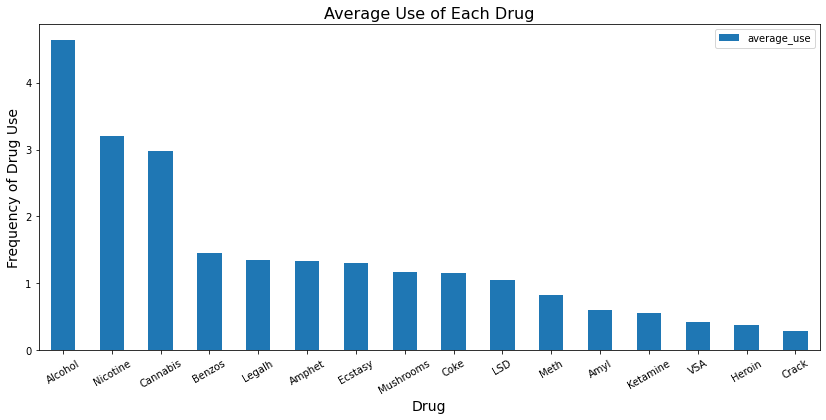

In [17]:
drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6))
plt.title('Average Use of Each Drug', size=16)
plt.xlabel('Drug', size=14)
plt.xticks(rotation=30)
plt.ylabel('Frequency of Drug Use', size=14)
plt.show()

### Initial Conclusions
* The most frequently consumed legal drugs are **Alcohol, Nicotine, and Benzodiazepines**. While the most frequently consumed illegal drugs are **Cannabis** (considered illegal for recreational use in the UK), **Legal Highs, Amphetamines, Ecstasy, Mushrooms, Cocaine, and LSD**. Legal highs are psychoactive substances containing a variety of chemical constituents, some of which are illegal and others that are not. They have effects that are similar to those of illegal drugs such as cocaine, cannabis, and ecstasy.

# Legal Drug Use EDA

In [18]:
legal_df = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                 'Nscore','Escore','Oscore', 'AScore','Cscore',
                 'Impulsive','SS','Alcohol','Nicotine', 'Benzos']]

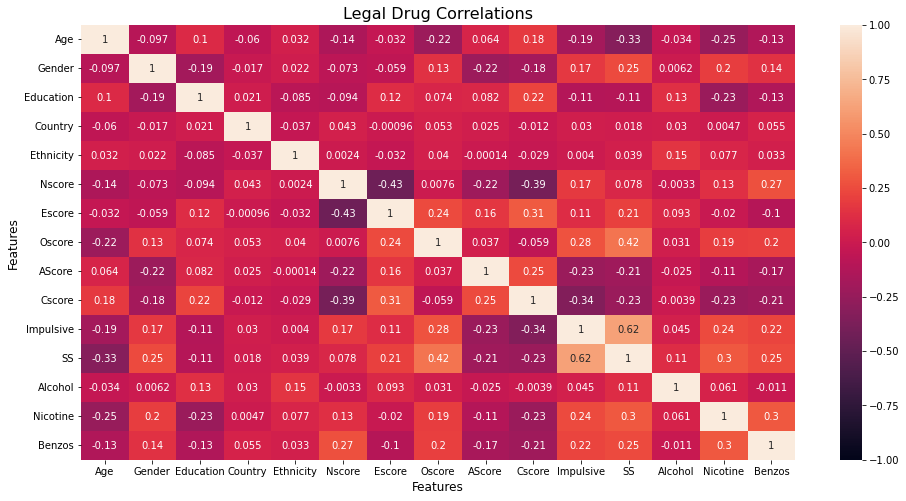

In [19]:
corr = legal_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Legal Drug Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

## Alcohol

Text(0.5, 1.03, 'Ethnicity vs Alcohol')

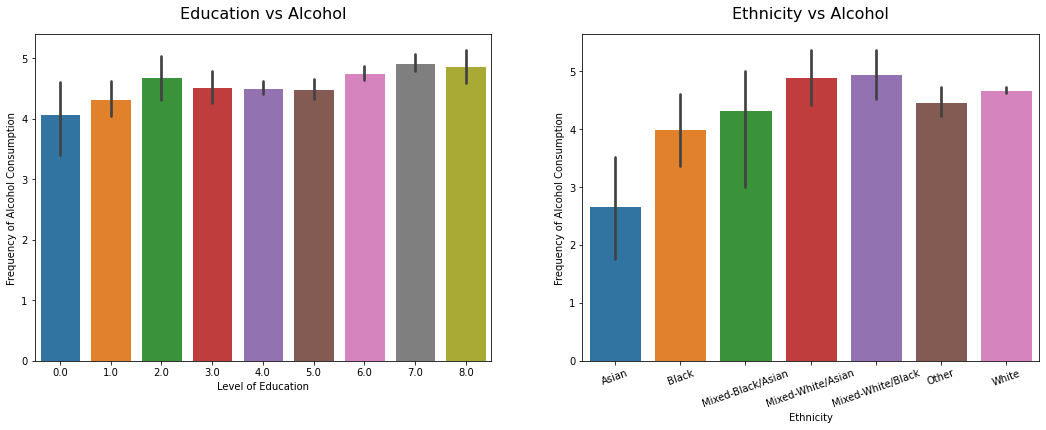

In [20]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ethnicities = ['Asian','Black','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black','Other','White']
sns.set_style('whitegrid')
sns.barplot(data=legal_df, x='Education', y='Alcohol', ax=ax1)
sns.barplot(data=legal_df, x='Ethnicity', y='Alcohol', ax=ax2)
ax1.set(xlabel='Level of Education', ylabel='Frequency of Alcohol Consumption')
ax2.set(xlabel='Ethnicity', ylabel='Frequency of Alcohol Consumption')
ax2.set_xticklabels(labels=ethnicities, rotation=20)
ax1.set_title('Education vs Alcohol', y=1.03, fontsize=16)   
ax2.set_title('Ethnicity vs Alcohol', y=1.03, fontsize=16) 

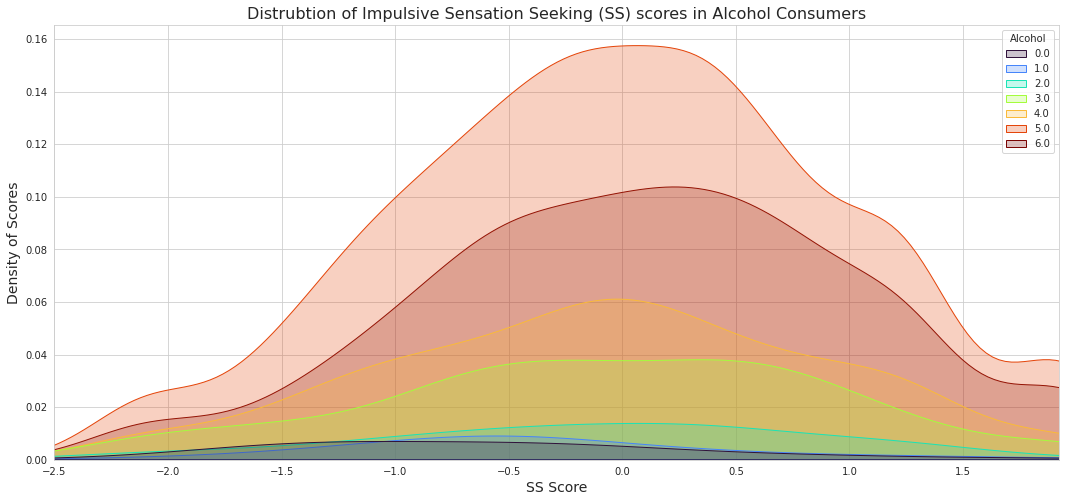

In [21]:
plt.figure(figsize=(18,8))
sns.kdeplot(x='SS', shade=True, hue='Alcohol', data=legal_df, palette='turbo')
plt.title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Alcohol Consumers', size=16)
plt.xlim(-2.5, data['SS'].max())
plt.xlabel('SS Score', size=14)
plt.ylabel('Density of Scores', size=14)
plt.show()

## Nicotine

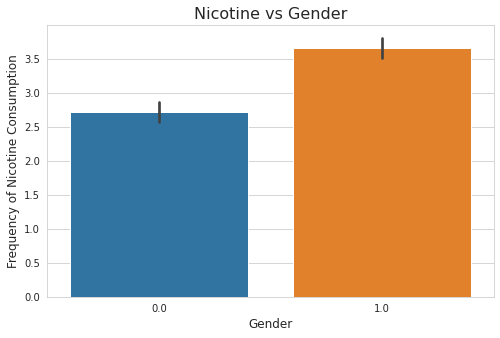

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=legal_df, x='Gender', y='Nicotine')
plt.title('Nicotine vs Gender', size=16)
plt.xlabel('Gender', size=12)
plt.ylabel('Frequency of Nicotine Consumption', size=12)
plt.show()

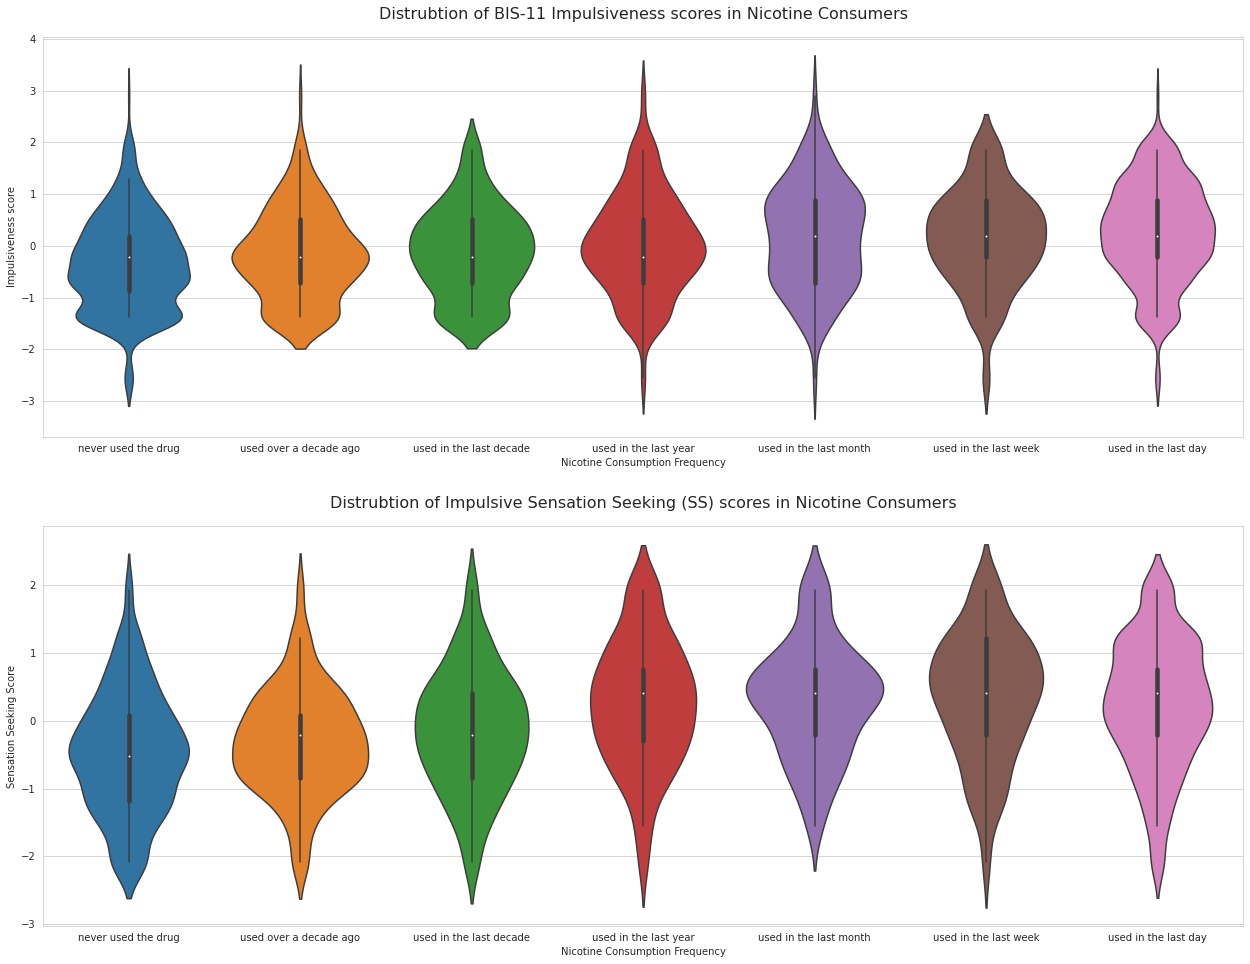

In [23]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Nicotine', y='Impulsive',  data=legal_df, ax=ax1)
sns.violinplot(x='Nicotine', y='SS', data=legal_df, ax=ax2)
ax1.set(xlabel = 'Nicotine Consumption Frequency', ylabel = 'Impulsiveness score')
ax2.set(xlabel = 'Nicotine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of BIS-11 Impulsiveness scores in Nicotine Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Nicotine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

## Benzodiazepines

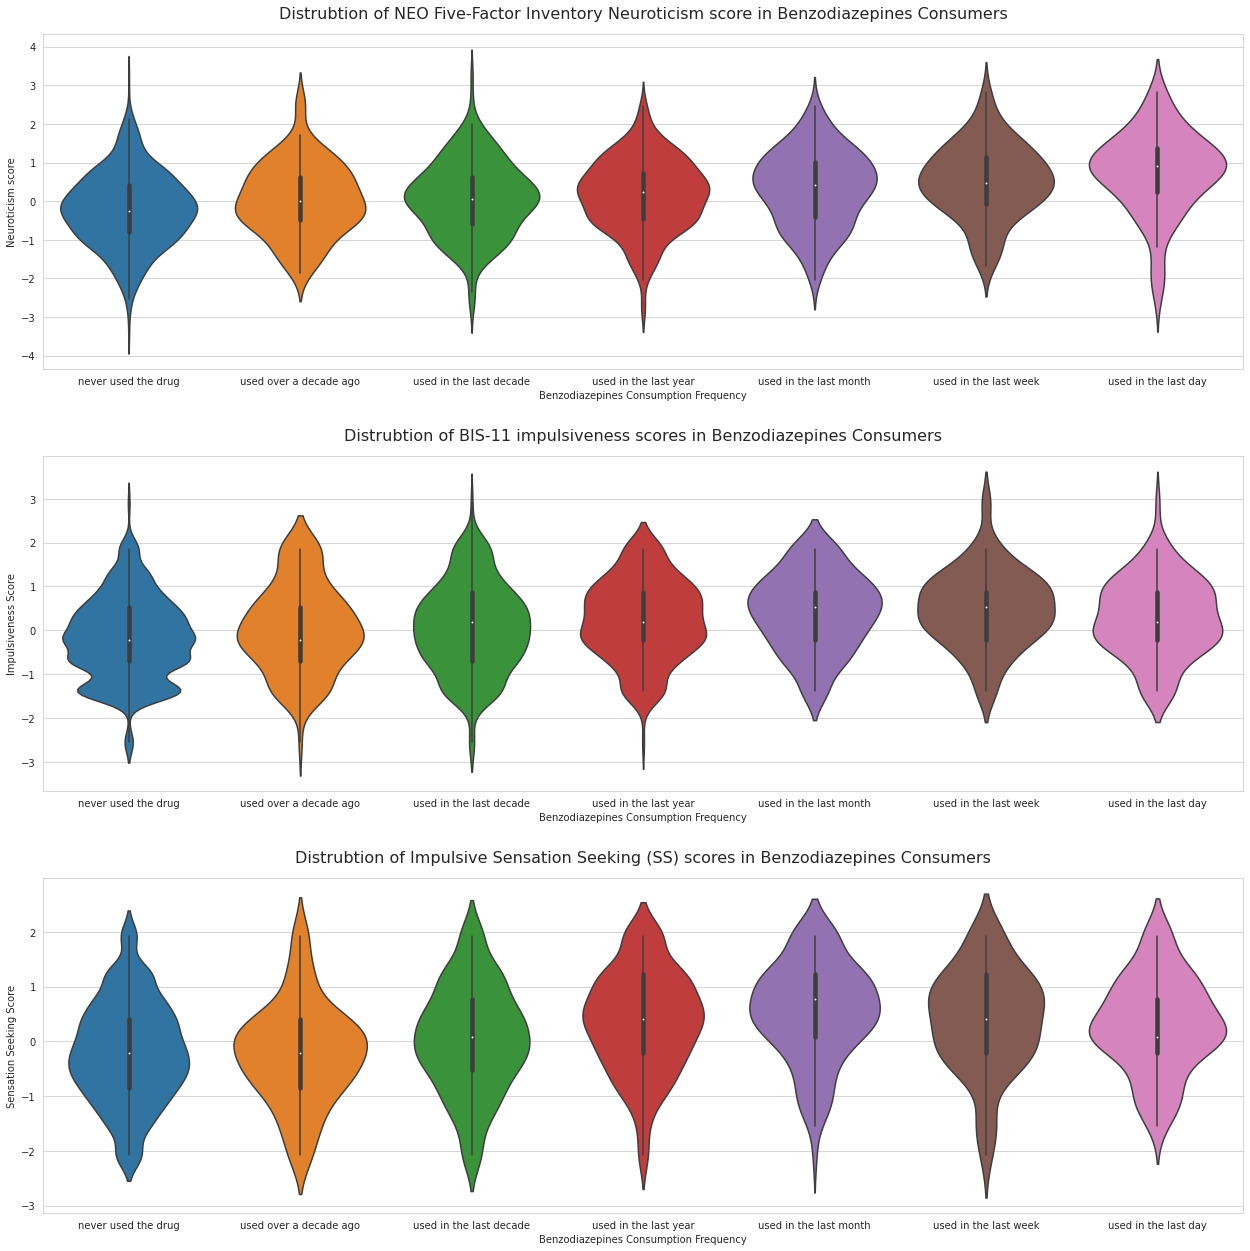

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Benzos', y='Nscore',  data=legal_df, ax=ax1)
sns.violinplot(x='Benzos', y='Impulsive', data=legal_df, ax=ax2)
sns.violinplot(x='Benzos', y='SS', data=legal_df, ax=ax3)
ax1.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Neuroticism score')
ax2.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Impulsiveness Score')
ax3.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of NEO Five-Factor Inventory Neuroticism score in Benzodiazepines Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of BIS-11 impulsiveness scores in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax3.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
ax3.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

In [25]:
both_df = legal_df.copy()
both_df['Nic_User'] = both_df['Nicotine'].apply(lambda x: 0.5 if x not in [0,1] else 0)
both_df['Benzo_User'] = both_df['Benzos'].apply(lambda x: 0.5 if x not in [0,1] else 0)
both_df['Both'] = both_df[['Nic_User', 'Benzo_User']].iloc[:].sum(axis=1)
both_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Nicotine,Benzos,Nic_User,Benzo_User,Both
0,1.0,1.0,8.0,5.0,6.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5.0,4.0,0.0,0.5,0.0,0.5
1,2.0,1.0,5.0,5.0,6.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,7.0,5.0,6.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4.0,2.0,3.0,0.5,0.5,1.0
3,2.0,0.0,8.0,5.0,6.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4.0,2.0,0.0,0.5,0.0,0.5
4,5.0,0.0,3.0,1.0,6.0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2.0,6.0,0.0,0.5,0.0,0.5


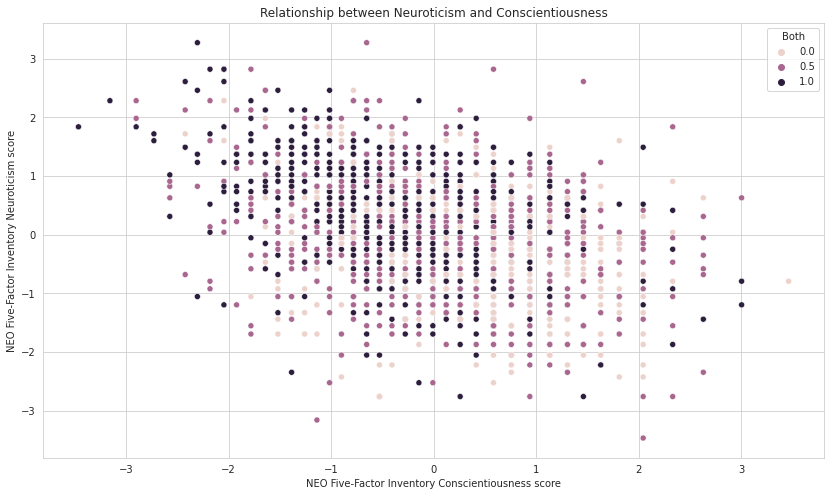

In [26]:
# 0.0 = non nicotine or benzo consumer
# 0.5 = consumes either drug
# 1.0 = consumes both drugs
plt.figure(figsize=(14,8))
sns.scatterplot(data=both_df, x='Cscore', y='Nscore', hue='Both')
plt.title('Relationship between Neuroticism and Conscientiousness')
plt.xlabel('NEO Five-Factor Inventory Conscientiousness score')
plt.ylabel('NEO Five-Factor Inventory Neuroticism score')
plt.show()

## Legal Drug Use Conclusions
* **Alcohol** consumption shows a slight positive correlation with the level of education, such that higher education is associated with more frequent alcohol consumption. More specifically those with a University Degree or higher (i.e. Masters or Doctorate) consumed the most Alcohol. In addition, frequent Alcohol consumers tended to show higher Impulsive Sensation Seeking (SS) scores, such that a majority of non-consumers (never drank or consumed over a decade ago) had an SS score close to **-1.0** while frequent consumers (consumed a week or a day ago) tended to score between **0 - 0.25**.
* Unlike alcohol, **nicotine** showed a marked difference in consumption between the genders with males consuming nicotine more frequently than females. Moreover, nicotine consumption was positively correlated with both the BIS-11 Impulsiveness score and SS. However, this relationship was slightly more pronounced in SS.
* I examined the relationship between **Benzo's** and various personality measures. Benzo consumption frequency showed a positive correlation with Neuroticism (Nscore), Impulsiveness, and SS scores. This correlation was strongest in Nscores. These findings align with other research that has suggested a relationship between Benzodiazepine sensitivity and neuroticism with those with higher neuroticism showing higher sensitivity to Benzos (Glue et al., 1995).
* Interestingly, I noticed a strong negative correlation between Nscore and Conciouenstiousness (Cscore). To further understand how this relationship was related to drug use I looked at nicotine and benzo consumption. Unsurprisingly, those who consumed both nicotine and benzo tended to have higher Nscores and lower Cscores while those who used neither drug showed high Cscores and low Nscores.


# Illegal Drug Use

In [27]:
illegal_df = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
                   'Escore','Oscore', 'AScore','Cscore','Impulsive','SS',
                   'Cannabis', 'Legalh', 'Amphet', 'Ecstasy', 'Mushrooms', 'Coke', 'LSD']]

In [28]:
illegal_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis,Legalh,Amphet,Ecstasy,Mushrooms,Coke,LSD
0,1.0,1.0,8.0,5.0,6.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,4.0,0.0,2.0,4.0,0.0,3.0,2.0
1,2.0,1.0,5.0,5.0,6.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,7.0,5.0,6.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,2.0,0.0,0.0,0.0,0.0,2.0,0.0
3,2.0,0.0,8.0,5.0,6.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3.0,1.0,1.0,1.0,2.0,0.0,0.0
4,5.0,0.0,3.0,1.0,6.0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0.0,0.0,0.0,0.0,0.0,0.0,0.0


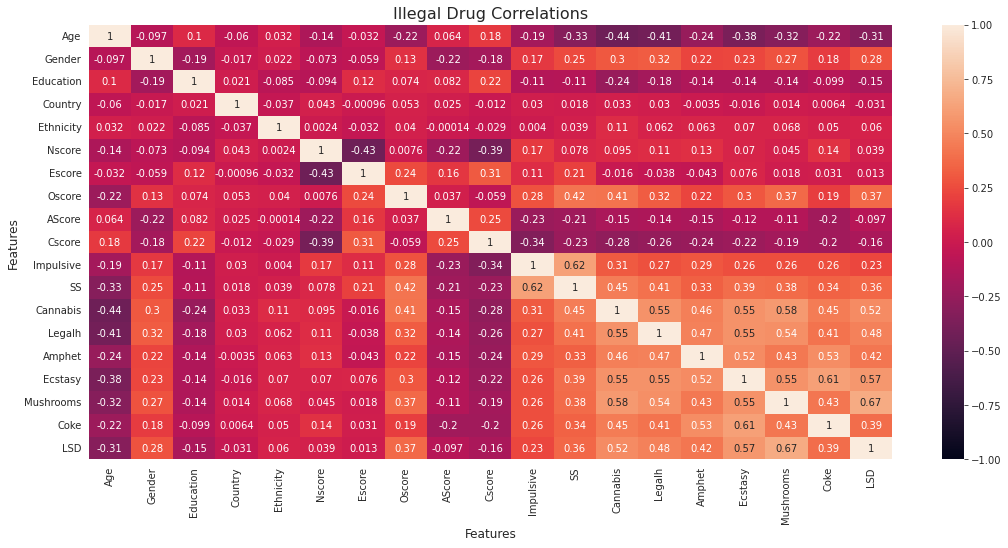

In [29]:
corr = illegal_df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Illegal Drug Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

## Cannabis

Text(0.5, 1.03, 'Age vs Cannabis')

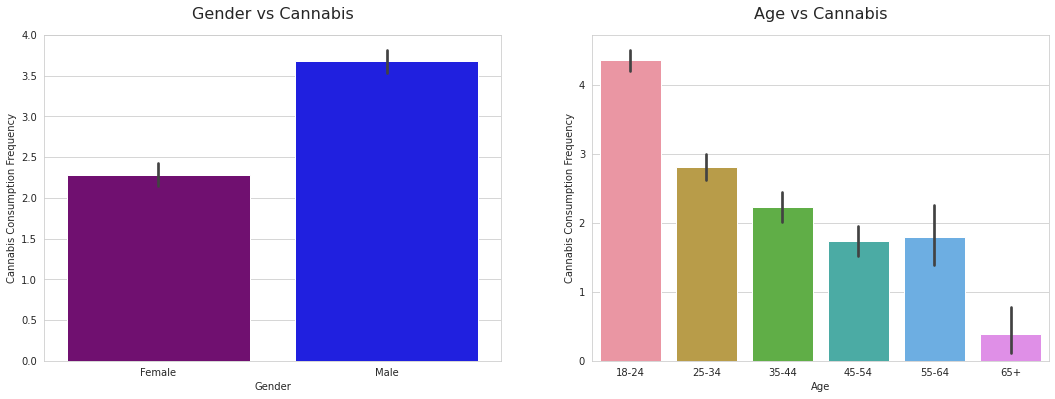

In [30]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
genders = ['Female', 'Male']
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
sns.set_style('darkgrid')
custom_palette=['purple','blue']   
sns.set_palette(custom_palette)
sns.barplot(x='Gender', y='Cannabis', data=illegal_df, ax=ax1)    
sns.barplot(x='Age',y='Cannabis', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Gender', ylabel = 'Cannabis Consumption Frequency')   
ax1.set_xticklabels(genders)
ax2.set(xlabel = 'Age', ylabel = 'Cannabis Consumption Frequency')   
ax2.set_xticklabels(ages)
ax1.set_title('Gender vs Cannabis', y=1.03, fontsize=16)   
ax2.set_title('Age vs Cannabis', y=1.03, fontsize=16) 

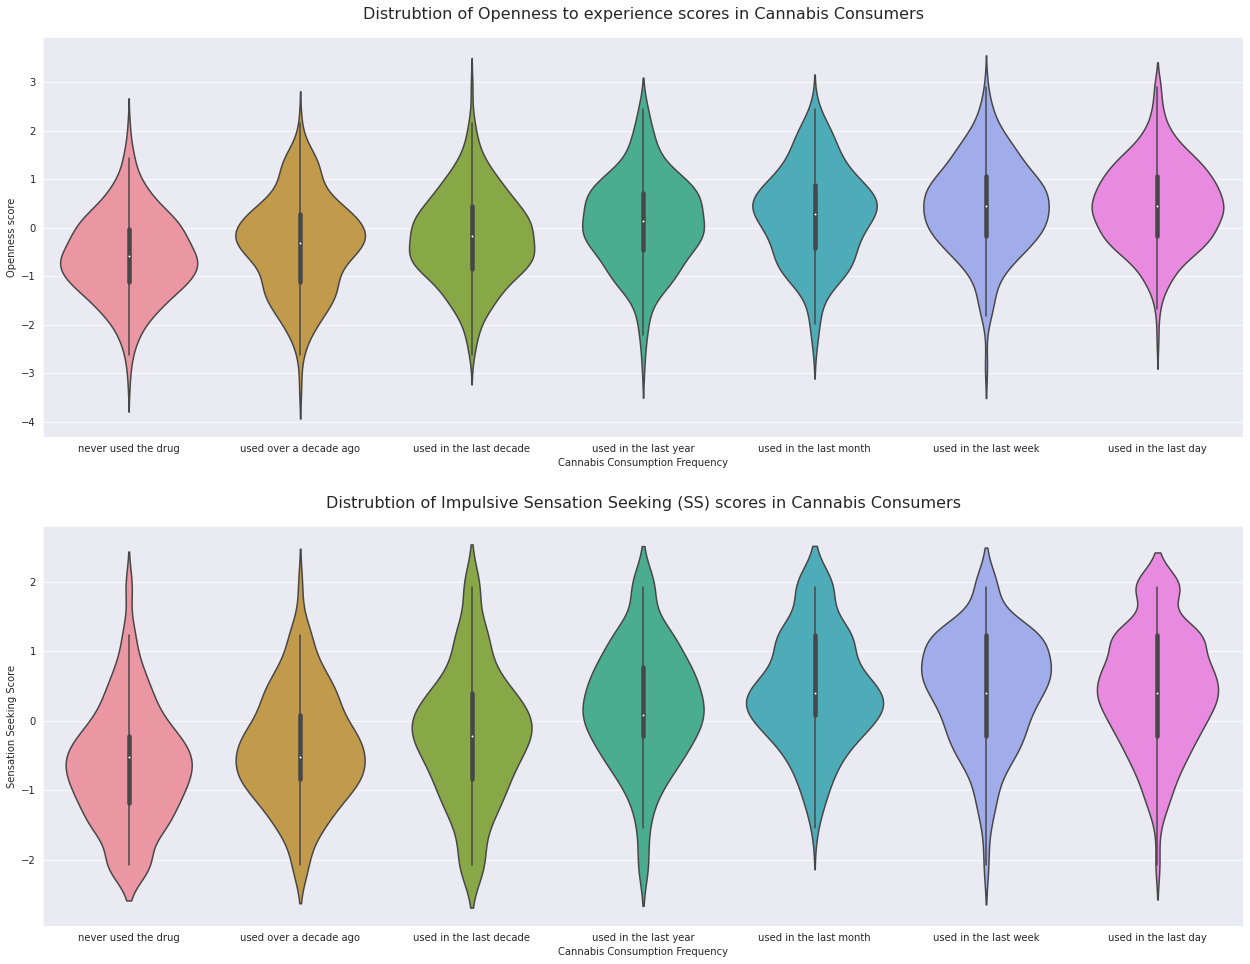

In [31]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Cannabis', y='Oscore',  data=illegal_df, ax=ax1)
sns.violinplot(x='Cannabis', y='SS', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Cannabis Consumption Frequency', ylabel = 'Openness score')
ax2.set(xlabel = 'Cannabis Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Openness to experience scores in Cannabis Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Cannabis Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

## Legalh

Text(0.5, 1.03, 'Age vs Legal Highs')

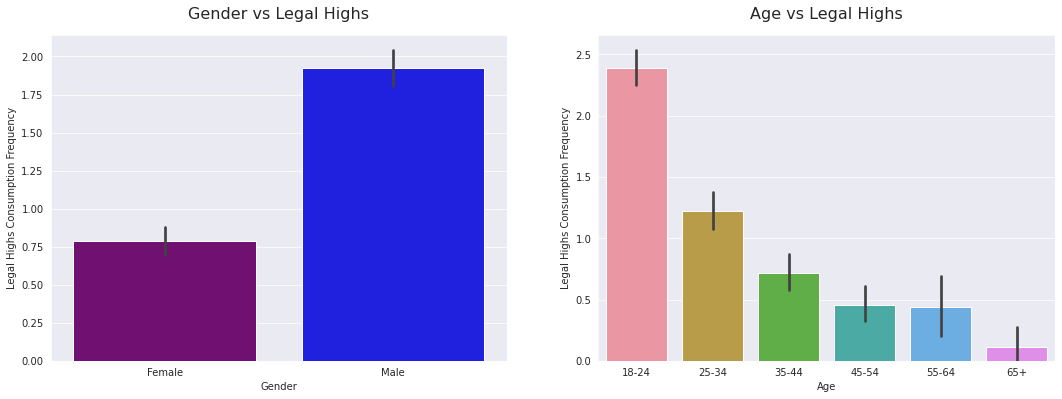

In [32]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
genders = ['Female', 'Male']
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
sns.set_style('darkgrid')
custom_palette=['purple','blue']   
sns.set_palette(custom_palette)
sns.barplot(x='Gender', y='Legalh', data=illegal_df, ax=ax1)    
sns.barplot(x='Age',y='Legalh', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Gender', ylabel = 'Legal Highs Consumption Frequency')   
ax1.set_xticklabels(genders)
ax2.set(xlabel = 'Age', ylabel = 'Legal Highs Consumption Frequency')   
ax2.set_xticklabels(ages)
ax1.set_title('Gender vs Legal Highs', y=1.03, fontsize=16)   
ax2.set_title('Age vs Legal Highs', y=1.03, fontsize=16) 

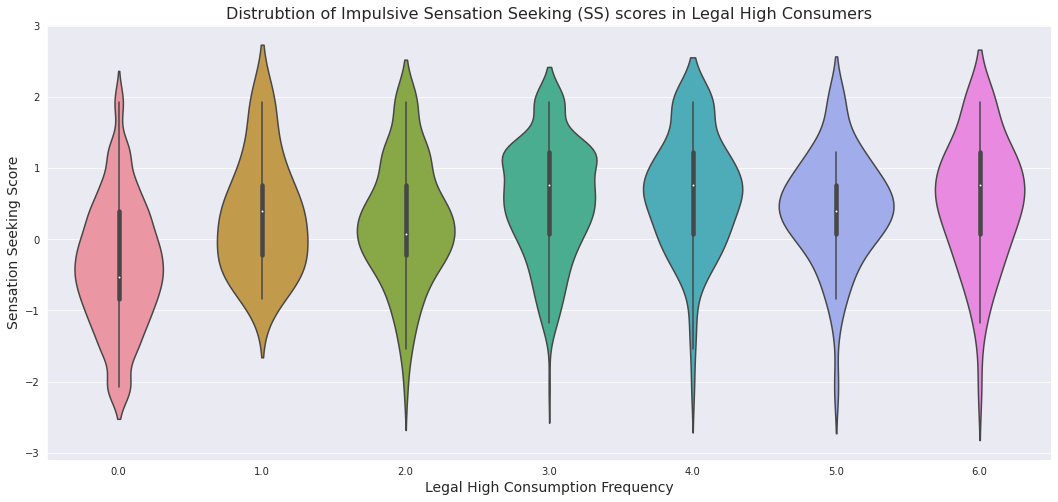

In [33]:
plt.figure(figsize=(18,8))
sns.violinplot(x='Legalh', y='SS', data=illegal_df)
plt.title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Legal High Consumers', size=16)
plt.xlabel('Legal High Consumption Frequency', size=14)
plt.ylabel('Sensation Seeking Score', size=14)
plt.show()

## Amphet

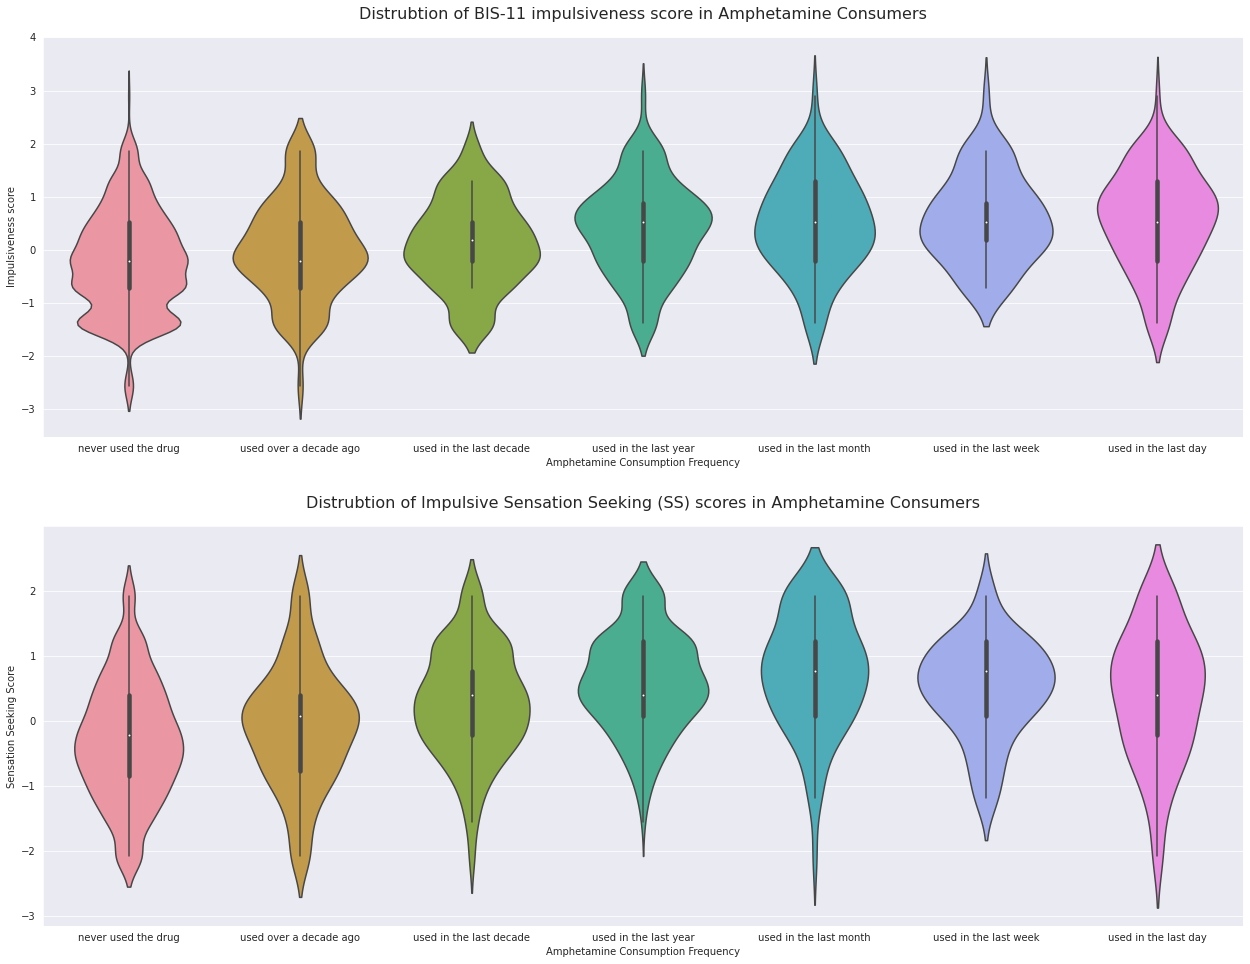

In [34]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Amphet', y='Impulsive',  data=illegal_df, ax=ax1)
sns.violinplot(x='Amphet', y='SS', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Amphetamine Consumption Frequency', ylabel = 'Impulsiveness score')
ax2.set(xlabel = 'Amphetamine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of BIS-11 impulsiveness score in Amphetamine Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Amphetamine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

## Ecstasy

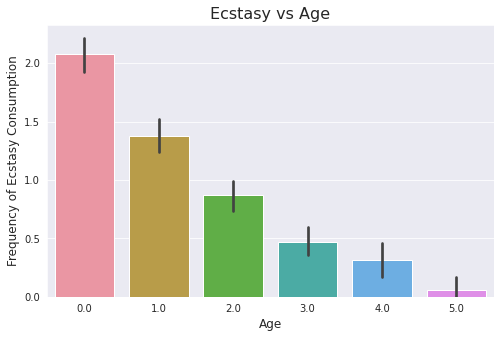

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(data=illegal_df, x='Age', y='Ecstasy')
plt.title('Ecstasy vs Age', size=16)
plt.xlabel('Age', size=12)
plt.ylabel('Frequency of Ecstasy Consumption', size=12)
plt.show()

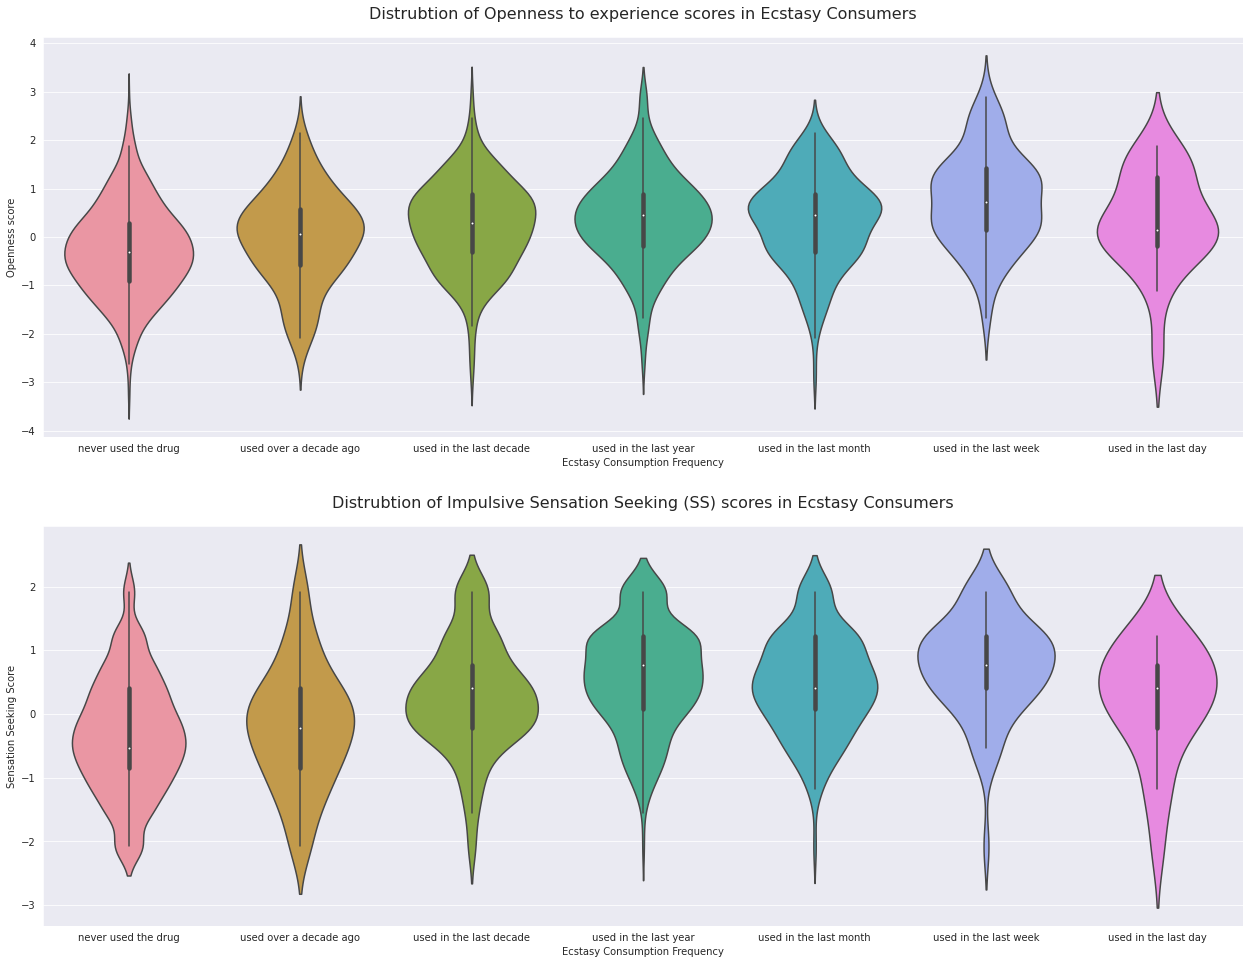

In [36]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Ecstasy', y='Oscore',  data=illegal_df, ax=ax1)
sns.violinplot(x='Ecstasy', y='SS', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Ecstasy Consumption Frequency', ylabel = 'Openness score')
ax2.set(xlabel = 'Ecstasy Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Openness to experience scores in Ecstasy Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Ecstasy Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

## Mushrooms

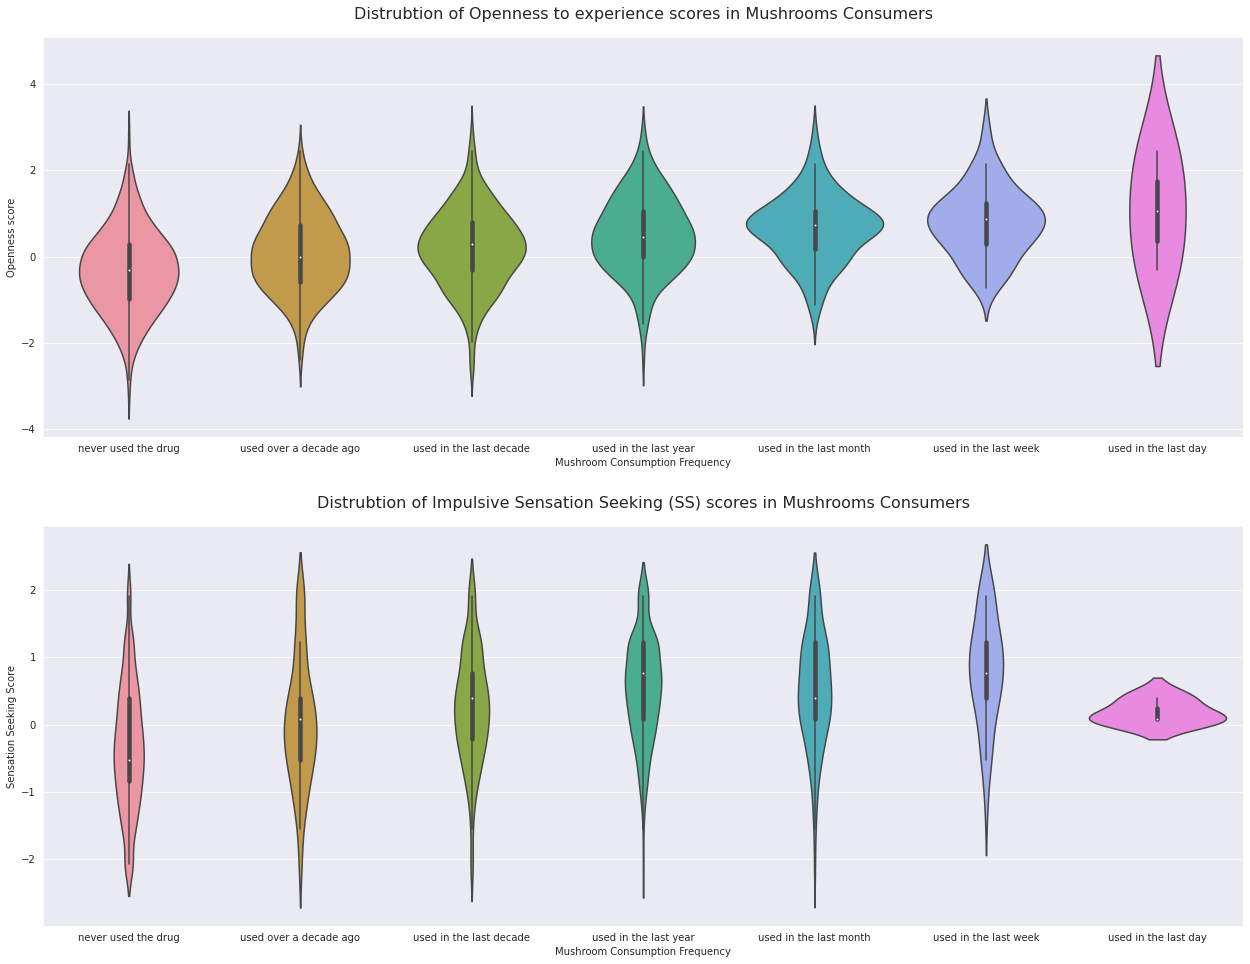

In [37]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Mushrooms', y='Oscore',  data=illegal_df, ax=ax1)
sns.violinplot(x='Mushrooms', y='SS', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Mushroom Consumption Frequency', ylabel = 'Openness score')
ax2.set(xlabel = 'Mushroom Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Openness to experience scores in Mushrooms Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Mushrooms Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

## Cocaine (excluding crack cocaine)

[Text(0, 0, 'never used the drug'),
 Text(1, 0, 'used over a decade ago'),
 Text(2, 0, 'used in the last decade'),
 Text(3, 0, 'used in the last year'),
 Text(4, 0, 'used in the last month'),
 Text(5, 0, 'used in the last week'),
 Text(6, 0, 'used in the last day')]

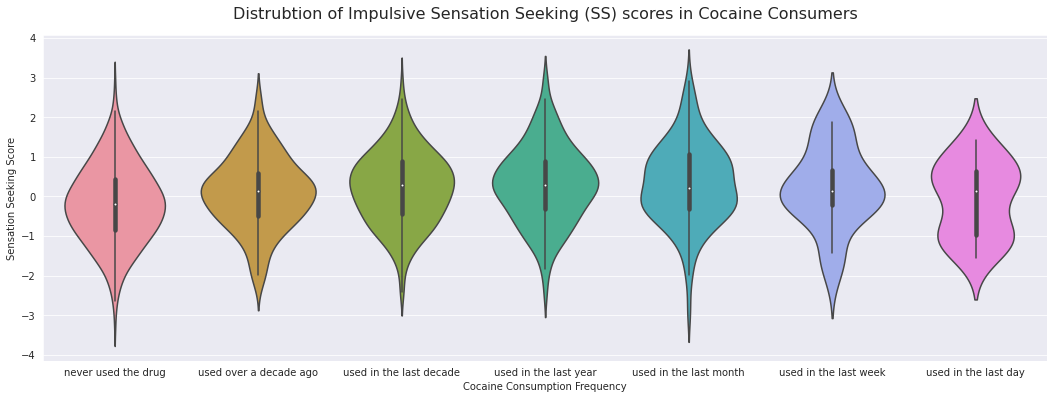

In [38]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Coke', y='Oscore',  data=illegal_df, ax=ax1)
ax1.set(xlabel = 'Cocaine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Cocaine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)

# Illegal Drug Use Conclusions
* In both **Cannabis and Legal highs** (legalh) males consumed the drug more frequently than females. In addition, cannabis, legalh's and ecstasy consumption frequency was negatively correlated with age such that younger individuals consumed more frequently than older individuals.
* All illegal drugs were positively correlated with SS. Individuals who never or rarely consumed one of the illegal drugs showed SS scores of **-0.5 to -1.0**, while frequent consumer's scores ranged between **0.5-1.5**. This relationship was most pronounced in legalh's.
* **Cannabis, ecstasy, and mushrooms** also showed a positive correlation with Openness to experience (Oscore), with most non and infrequent consumers scores ranging between **0 to -0.5** while most frequent consumers had scores between **0.5 - 1.0**.

# Co-occuring Use

In [39]:
# Determine whether the individual uses both Cannabis and Mushrooms
canMush_df = illegal_df.copy()
canMush_df['Can_User'] = canMush_df['Cannabis'].apply(lambda x: 0.5 if x not in [0,1,2] else 0)
canMush_df['Mush_User'] = canMush_df['Mushrooms'].apply(lambda x: 0.5 if x not in [0,1,2] else 0)
canMush_df['Group'] = canMush_df[['Can_User', 'Mush_User']].iloc[:].sum(axis=1)

In [40]:
# Determine whether the individual uses Amphet, Cocaine, Ecstasy, and LSD
HalluStim_df = illegal_df.copy()
HalluStim_df['Amphet_User'] = HalluStim_df['Amphet'].apply(lambda x: 0.25 if x not in [0,1] else 0)
HalluStim_df['Coke_User'] = HalluStim_df['Coke'].apply(lambda x: 0.25 if x not in [0,1] else 0)
HalluStim_df['Ecstasy_User'] = HalluStim_df['Ecstasy'].apply(lambda x: 0.25 if x not in [0,1] else 0)
HalluStim_df['LSD_User'] = HalluStim_df['LSD'].apply(lambda x: 0.25 if x not in [0,1] else 0)
HalluStim_df['Group'] = HalluStim_df[['Amphet_User', 'Coke_User', 'Ecstasy_User', 'LSD_User']].iloc[:].sum(axis=1)

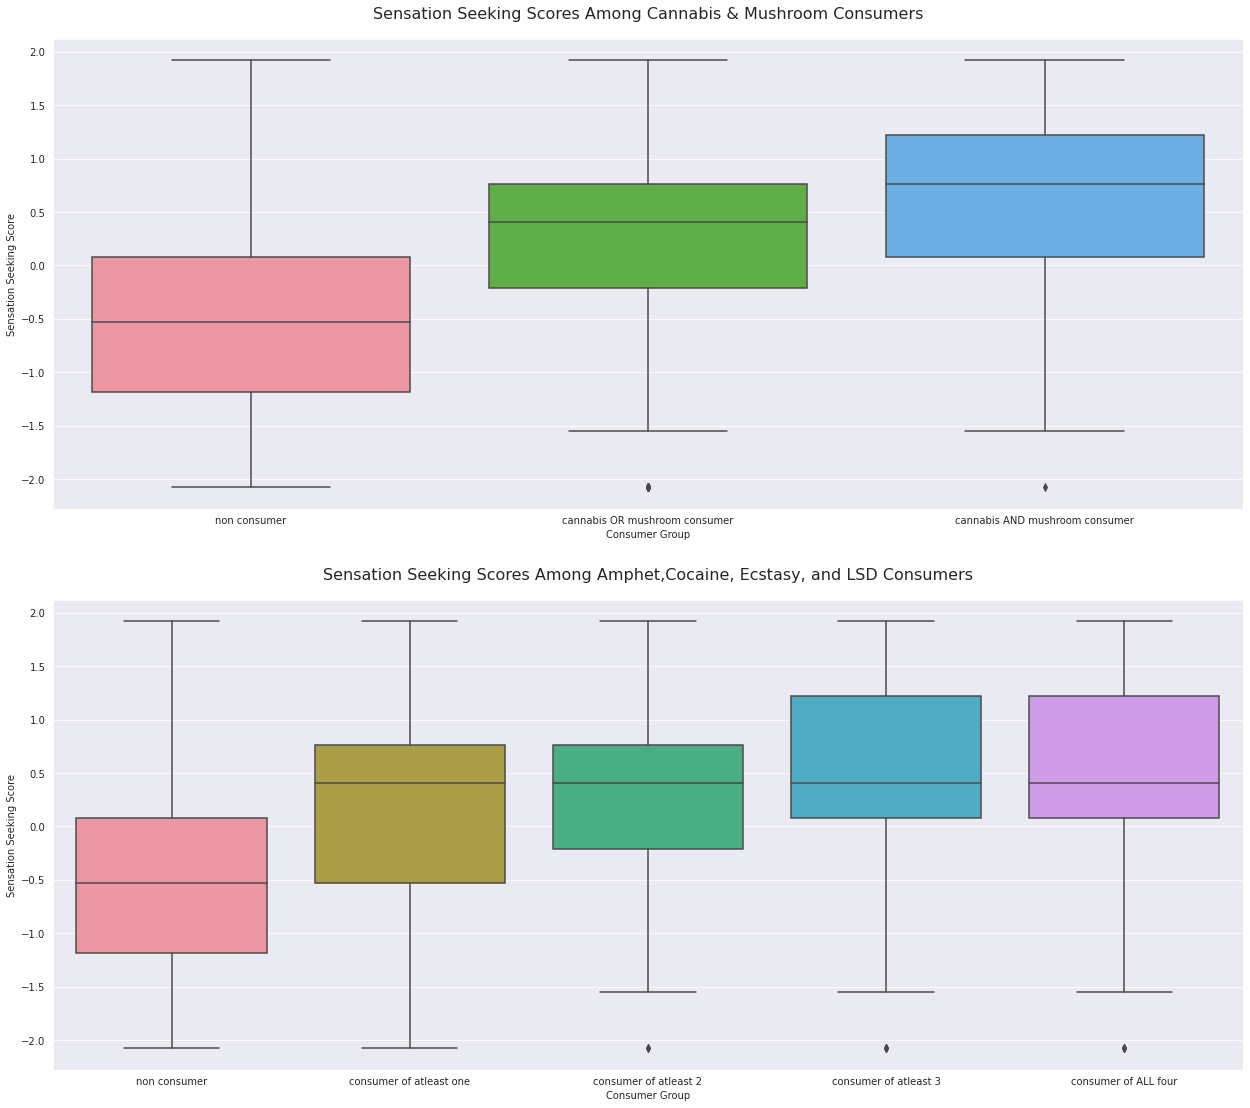

In [41]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,16))
sns.boxplot(x='Group', y='SS', data=canMush_df, ax=ax1)
sns.boxplot(x='Group', y='SS', data=HalluStim_df, ax=ax2)
group = ['non consumer', 'cannabis OR mushroom consumer', 'cannabis AND mushroom consumer']
group2 = ['non consumer', 'consumer of atleast one', 'consumer of atleast 2', 'consumer of atleast 3', 'consumer of ALL four']
ax1.set(xlabel = 'Consumer Group', ylabel = 'Sensation Seeking Score')
ax2.set(xlabel = 'Consumer Group', ylabel = 'Sensation Seeking Score')
ax1.set_title('Sensation Seeking Scores Among Cannabis & Mushroom Consumers', y=1.03, fontsize=16)   
ax2.set_title('Sensation Seeking Scores Among Amphet,Cocaine, Ecstasy, and LSD Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=group)
ax2.set_xticklabels(labels=group2)
f.tight_layout(pad=3.0)

## Final Conclusions
* Since SS seemed to have the highest positive correlation in all drugs (legal or illegal) I wanted to examine this relationship in terms of drugs that tend to be used together. Of note, drugs like ecstasy and cocaine tended to have a significant positive correlation (**0.61**) while mushrooms and LSD correlated **0.67**. I found that those who use both cannabis and mushrooms scored higher on SS on average than those who did not consume either drug. The same pattern was seen in my Amphet, Cocaine, Ecstasy, and LSD consumption comparison. Individuals who did not use any of the drugs showed SS scores between **0 and -1.0** with most of these individuals having a score of **-0.5**, while those who consumed all at least 3/4 drugs had SS scores between **0 and 1.25** with most scoring around **0.4 - 0.5**.
* Finally, I would like to point out how since SS scores showed the greatest correlation with drugs, as a personality measure it may be the single most robust measure for drug use and/or abuse. This personality can score may serve to aid our understanding of individuals who are most a risk to suffer from drug addiction or drug use in general which can provide physicians and therapists which a clearer and more nuanced understanding of this patient population.

## References
1. Glue, P., Wilson, S., Coupland, N., Ball, D., & Nutt, D. (1995). The relationship between benzodiazepine receptor sensitivity and neuroticism. Journal of Anxiety Disorders, 9(1), 33–45. https://doi.org/10.1016/0887-6185(94)00026-7